In [173]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score,precision_score, f1_score
from sklearn.feature_selection import SequentialFeatureSelector

In [174]:
train=pd.read_csv('train.csv')
train=train.set_index('id')

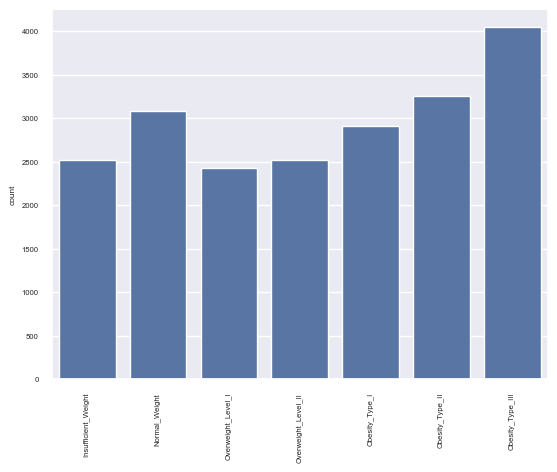

In [175]:
# in general the dataset is somehow balanced
x_order=['Insufficient_Weight', 'Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']
sns.countplot(x='NObeyesdad',data=train,order=x_order)
plt.xticks(rotation=90)
plt.xlabel('')
plt.show()

In [176]:
train.NObeyesdad=train.NObeyesdad.map({'Insufficient_Weight':0, 'Normal_Weight':1,'Overweight_Level_I':2,'Overweight_Level_II':3,'Obesity_Type_I':4,'Obesity_Type_II':5,'Obesity_Type_III':6})

In [177]:
categorical_train=train.select_dtypes('O')
numeric_train=train.drop(categorical_train.columns.tolist()+['NObeyesdad'],axis=1)

<Axes: >

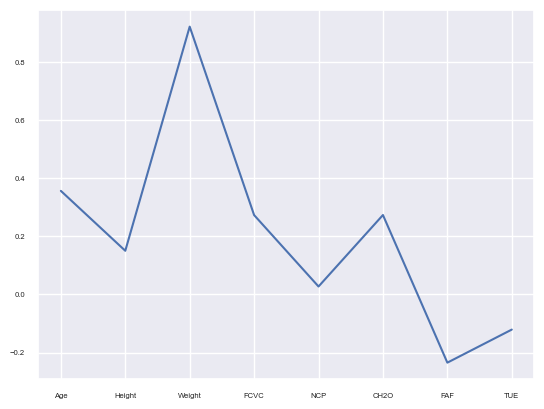

In [178]:
pd.concat([numeric_train,train.NObeyesdad],axis=1).corr()['NObeyesdad'][:-1].plot()

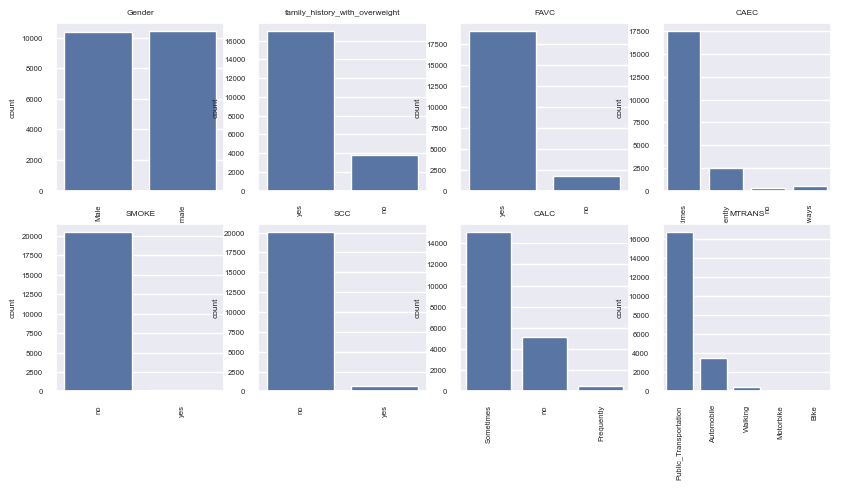

In [179]:
plt.figure(figsize=(10,10))
k=1
for item in categorical_train.columns:
    plt.subplot(4,4,k)
    sns.countplot(categorical_train,x=item)
    sns.set(font_scale=0.5)
    plt.title(item)
    plt.xticks(rotation=90)
    plt.xlabel('')
    k+=1

In [180]:
categorical_train.SCC=categorical_train.SCC.map({'yes':1,'no':0})
categorical_train.SMOKE=categorical_train.SMOKE.map({'yes':1,'no':0})
categorical_train.FAVC=categorical_train.FAVC.map({'yes':1,'no':0})
categorical_train.family_history_with_overweight=categorical_train.family_history_with_overweight.map({'yes':1,'no':0})
categorical_train.Gender=categorical_train.Gender.map({'Male':0,'Female':1})
categorical_train.CAEC=categorical_train.CAEC.map({'no':0,'Sometimes':1,'Frequently':2,'Always':3})
categorical_train.CALC=categorical_train.CALC.map({'no':0,'Sometimes':1,'Frequently':2})
cat_MRTANS=pd.get_dummies(categorical_train.MTRANS,drop_first=True,dtype='float')
categorical_train=categorical_train.drop('MTRANS',axis=1)
categorical_train=pd.concat([categorical_train,cat_MRTANS],axis=1)

In [181]:
#remove quasi-constant feature
quasi_constant_feature=[]
threshold=0.99
for feature in categorical_train.columns:
    predominant=(categorical_train.loc[:,feature].value_counts()/len(categorical_train)).sort_values(ascending=False).values[0]
    if predominant>threshold:
        quasi_constant_feature.append(feature)
quasi_constant_feature

['Bike', 'Motorbike']

In [182]:
categorical_train=categorical_train.drop(quasi_constant_feature,axis=1)

In [183]:
df=pd.concat([numeric_train,categorical_train,train.NObeyesdad],axis=1)

In [184]:
X=df.drop('NObeyesdad',axis=1)
y=df.NObeyesdad

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [191]:
xgbc_model=xgb.XGBClassifier()

In [187]:
xgbc_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [188]:
xgbc_model.score(X_train,y_train)

0.9867517764663375

In [189]:
xgbc_model.score(X_test,y_test)

0.9010115606936416